In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1.1

In [2]:
w_df = pd.read_csv('wage.csv')

In [3]:
w_df.head(5)

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [4]:
np.max(w_df['wage'])

24.98

In [5]:
w_df.shape

(526, 24)

In [6]:
w_df.isnull().sum()

wage        0
educ        0
exper       0
tenure      0
nonwhite    0
female      0
married     0
numdep      0
smsa        0
northcen    0
south       0
west        0
construc    0
ndurman     0
trcommpu    0
trade       0
services    0
profserv    0
profocc     0
clerocc     0
servocc     0
lwage       0
expersq     0
tenursq     0
dtype: int64

## 1.2

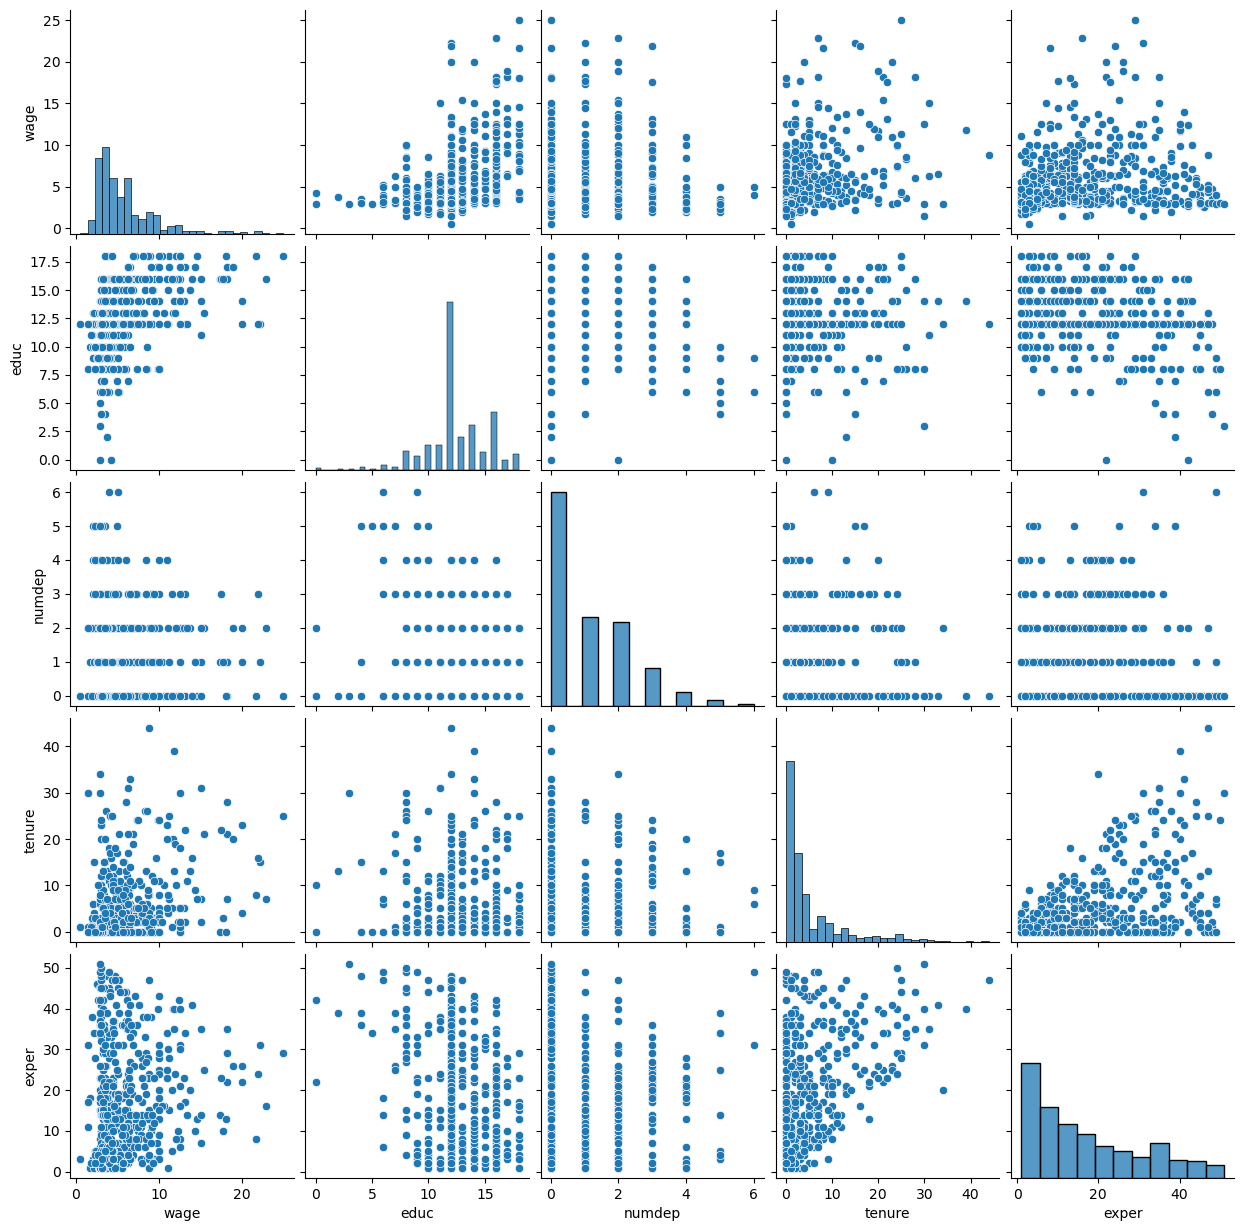

In [7]:
sns.pairplot(w_df[['wage', 'educ', 'numdep', 'tenure', 'exper']])

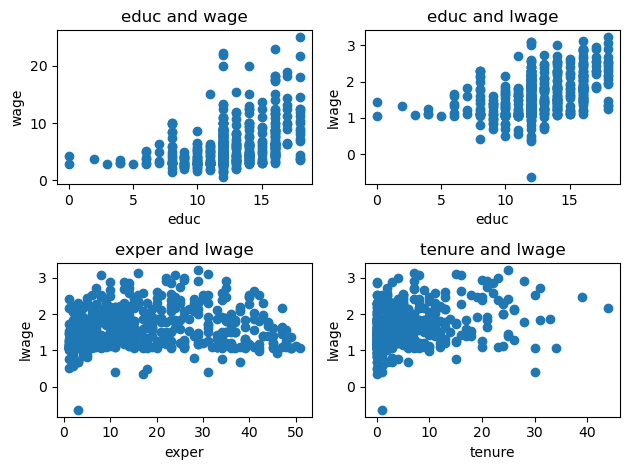

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(w_df['educ'], w_df['wage'])
ax1.set_title('educ and wage')
ax1.set_xlabel('educ')
ax1.set_ylabel('wage')

ax2.scatter(w_df['educ'], w_df['lwage'])
ax2.set_title('educ and lwage')
ax2.set_xlabel('educ')
ax2.set_ylabel('lwage')

ax3.scatter(w_df['exper'], w_df['lwage'])
ax3.set_title('exper and lwage')
ax3.set_xlabel('exper')
ax3.set_ylabel('lwage')

ax4.scatter(w_df['tenure'], w_df['lwage'])
ax4.set_title('tenure and lwage')
ax4.set_xlabel('tenure')
ax4.set_ylabel('lwage')

plt.tight_layout()

## 1.3

__I think OLS Regression is more suitable for understanding what factors explain variability in wage. The graphs of education against wages, education against lwages, experience or tenure against lwages do  show a linear relationship.__

## 1.4

$ wage = \beta_0 +\beta_1 educ_i + \beta_2 exper_i + \beta_3 tenure_i + \beta_4 married_i + \beta_5 female_i + \epsilon_i $

## 1.5

In [61]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mod = smf.ols(formula='wage ~ educ + exper + tenure + married + female + profocc + west', data=w_df)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.20e-56
Time:                        10:38:28   Log-Likelihood:                -1291.6
No. Observations:                 526   AIC:                             2599.
Df Residuals:                     518   BIC:                             2633.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3094      0.741     -0.418      0.6

## 1.6

__The regression shows that the coefficients for educ, tenure and whether the person is female are statitically significant at $\alpha = 0.05$__

## 1.7

__The model explains 41.8% of the variation of wages for different individuals.__

## 1.8

In [70]:
hypothetical = pd.DataFrame({"educ": [281], "exper": [270], "tenure": [255], 
"married": [1], "female": [0], "profocc": [1], "west": [1]})
hypothetical_prediction = res.predict(hypothetical)

In [71]:
hypothetical_prediction

0    150.141537
dtype: float64

## 2.1

In [8]:
d_df = pd.read_csv('diabetes.csv')

In [73]:
d_df.head(5)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,neg
1,0,137,40,35,168,43.1,2.288,33,pos
2,3,78,50,32,88,31.0,0.248,26,pos
3,2,197,70,45,543,30.5,0.158,53,pos
4,1,189,60,23,846,30.1,0.398,59,pos


In [75]:
d_df.shape

(392, 9)

In [76]:
d_df.isnull().sum()

pregnant    0
glucose     0
pressure    0
triceps     0
insulin     0
mass        0
pedigree    0
age         0
diabetes    0
dtype: int64

In [80]:
d_df.dtypes

pregnant      int64
glucose       int64
pressure      int64
triceps       int64
insulin       int64
mass        float64
pedigree    float64
age           int64
diabetes     object
dtype: object

In [11]:
diabetes_diag = {'neg': 0, 'pos':1}
d_df['diabetes_int'] = d_df['diabetes'].map(diabetes_diag)
d_df.head(5)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes,diabetes_int
0,1,89,66,23,94,28.1,0.167,21,neg,0
1,0,137,40,35,168,43.1,2.288,33,pos,1
2,3,78,50,32,88,31.0,0.248,26,pos,1
3,2,197,70,45,543,30.5,0.158,53,pos,1
4,1,189,60,23,846,30.1,0.398,59,pos,1


## 2.2

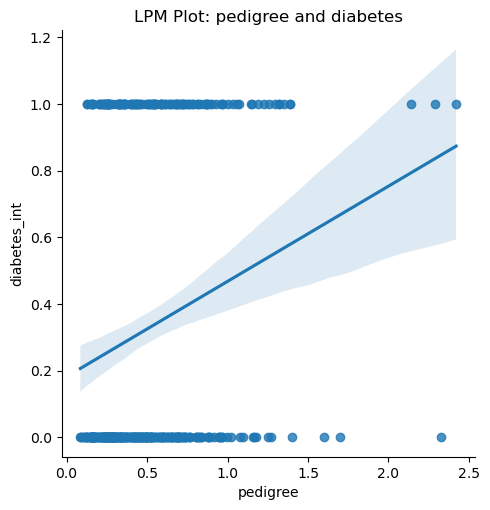

In [29]:
sns.lmplot(x='pedigree', y='diabetes_int', data=d_df).set(title='LPM Plot: pedigree and diabetes')

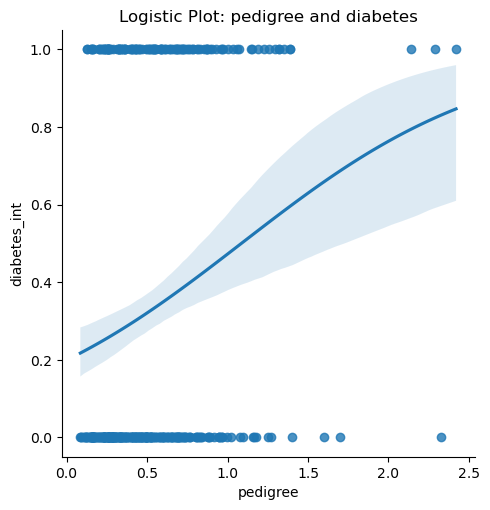

In [30]:
sns.lmplot(x='pedigree', y='diabetes_int', data=d_df, logistic= True).set(title='Logistic Plot: pedigree and diabetes')

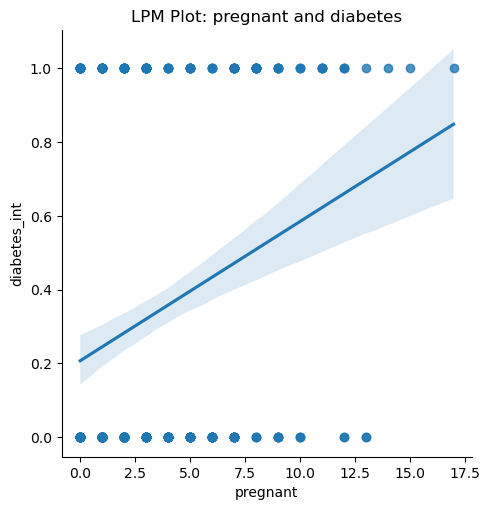

In [31]:
sns.lmplot(x='pregnant', y='diabetes_int', data=d_df).set(title='LPM Plot: pregnant and diabetes')

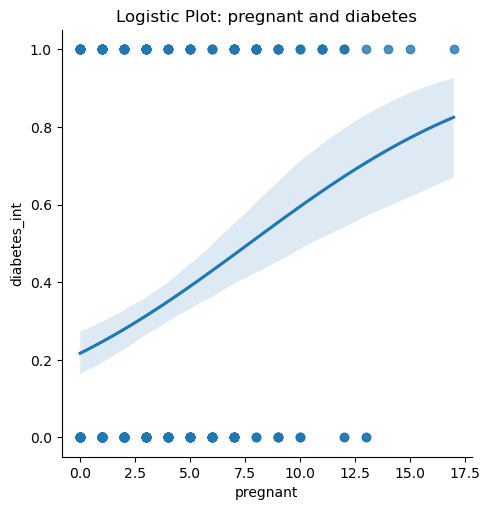

In [32]:
sns.lmplot(x='pregnant', y='diabetes_int', data=d_df, logistic= True).set(title='Logistic Plot: pregnant and diabetes')

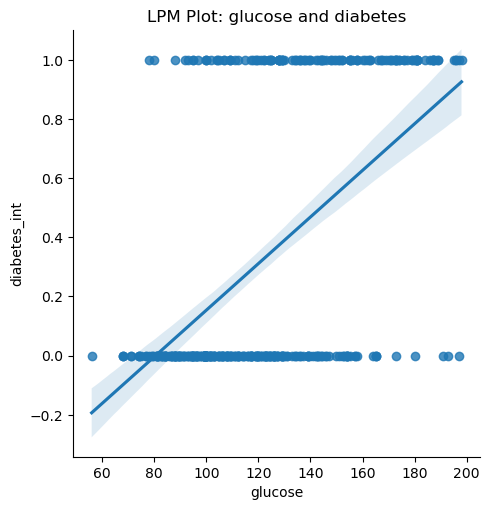

In [33]:
sns.lmplot(x='glucose', y='diabetes_int', data=d_df).set(title='LPM Plot: glucose and diabetes')

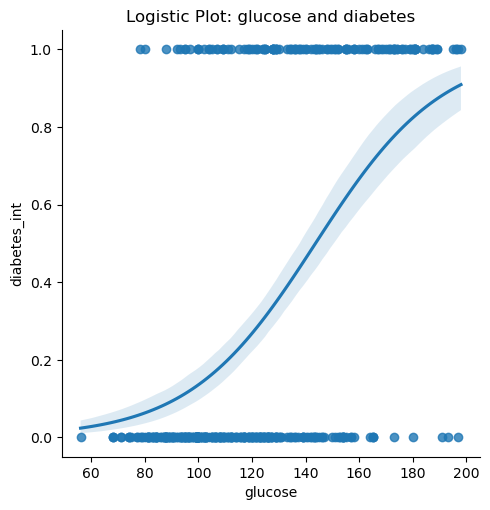

In [34]:
sns.lmplot(x='glucose', y='diabetes_int', data=d_df, logistic= True).set(title='Logistic Plot: glucose and diabetes')

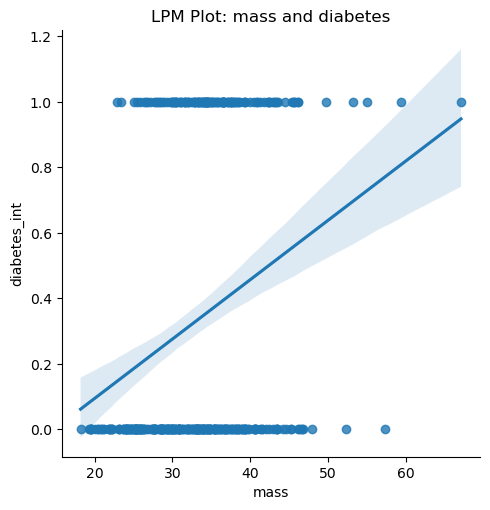

In [35]:
sns.lmplot(x='mass', y='diabetes_int', data=d_df).set(title='LPM Plot: mass and diabetes')

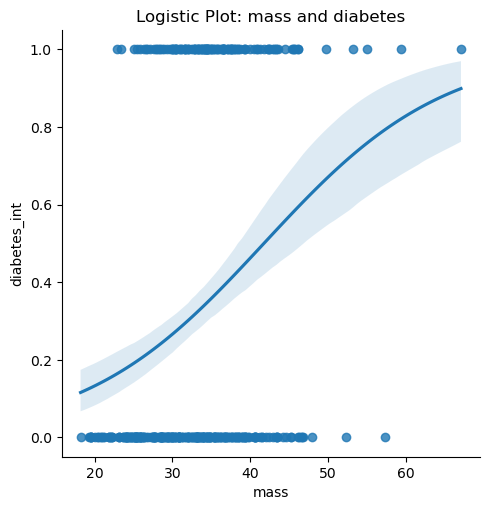

In [36]:
sns.lmplot(x='mass', y='diabetes_int', data=d_df, logistic= True).set(title='Logistic Plot: mass and diabetes')

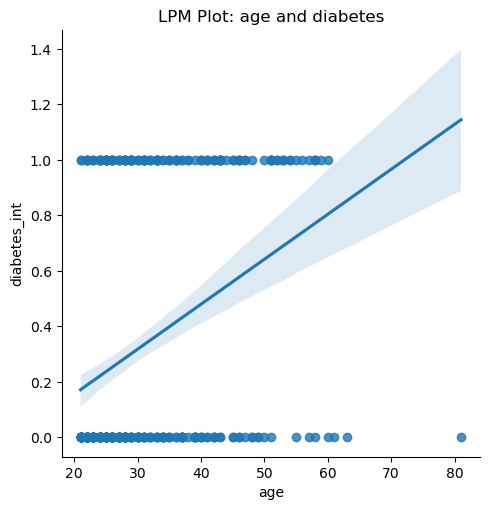

In [37]:
sns.lmplot(x='age', y='diabetes_int', data=d_df).set(title='LPM Plot: age and diabetes')

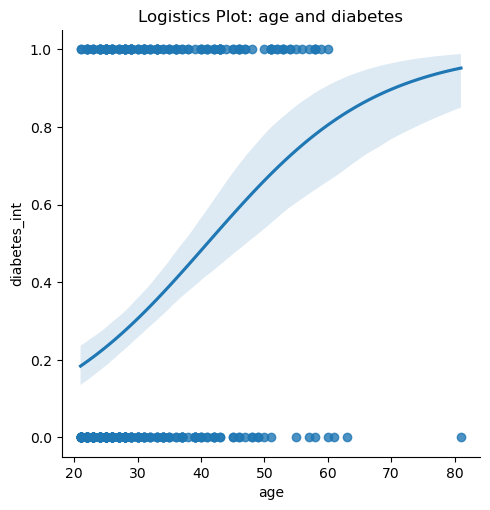

In [39]:
sns.lmplot(x='age', y='diabetes_int', data=d_df, logistic= True).set(title='Logistics Plot: age and diabetes')

## 2.3

__A Logistic Regression is more suitable. The dependent variable is a true or false binary outcome. The regression should be predicting the probability.__

## 2.4

$ pr(diabetes = 1 | X,\beta) = $$ e ^ {\beta_0 + \beta_1 pregnant + \beta_2 glucose + \beta_3 mass + \beta_4 pedigree + \beta_5 age} \over 1 + e ^ {\beta_0 + \beta_1 pregnant + \beta_2 glucose + \beta_3 mass + \beta_4 pedigree + \beta_5 age} $$ $

## 2.5

In [97]:
from statsmodels.discrete.discrete_model import Logit
dfy = d_df['diabetes_int']
dfx = sm.add_constant(d_df[['pregnant', 'glucose', 'mass', 'pedigree', 'age']])
mod = Logit(dfy, dfx)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.439905
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           diabetes_int   No. Observations:                  392
Model:                          Logit   Df Residuals:                      386
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Nov 2022   Pseudo R-squ.:                  0.3076
Time:                        11:44:37   Log-Likelihood:                -172.44
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 2.764e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9921      1.087     -9.193      0.000     -12.122      -7.862
pregnant       0.0840      0.

In [42]:
np.exp(-9.9921)

4.576000965045239e-05

## 2.6

* When other variables are 0, the odds ratio of having diabete is $e^{-9.9921} = 4.576000965045239e-05$
* A unit increase of pregnant times increases the log odds of having diabetes by 0.084;
* A unit increase of plasma glucose concentration increases the log odds of having diabetes by 0.0365;
* A unit increase of body mass index increases the log odds of having diabetes by 0.0781;
* A unit increase of pedigree increases the log odds of having diabetes by 1.1509;
* A unit increase of age increases the log odds of having diavetes by 0.0344

## 2.7

In [93]:
d_df[['pregnant', 'glucose', 'mass', 'pedigree', 'age']].describe()

,pregnant,glucose,mass,pedigree,age
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,33.086224,0.523046,30.864796
std,3.211424,30.860781,7.027659,0.345488,10.200777
min,0.000000,56.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,28.400000,0.269750,23.000000
50%,2.000000,119.000000,33.200000,0.449500,27.000000
75%,5.000000,143.000000,37.100000,0.687000,36.000000
max,17.000000,198.000000,67.100000,2.420000,81.000000


In [106]:
hypothetical = [[1, 2, 119, 33.2, 0.4495, 27], [1, 5, 143, 37.1, 0.687, 36], [1, 1, 99, 28.4, 0.26975, 23]]
hypothetical_prediction = res.predict(hypothetical)

In [107]:
hypothetical_prediction

array([0.19055135, 0.63824141, 0.04838718])